In [1]:
from nsaba.nsaba import Nsaba
from nsaba.nsaba import analysis
from nsaba.nsaba import geneinfo
import os
%matplotlib inline


/Users/simonhaxby/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
data_dir = "../../data_dir"

In [3]:
# loading class DataFrames
Nsaba.aba_load(data_dir)
Nsaba.ns_load(data_dir)

This may take a minute or two ...
SampleAnnot.csv loaded.
MicroarrayExpression.csv loaded.
Probes.csv loaded.
Nsaba.aba['mni_coords'] initialized.

This may take a minute or two ...
database.txt loaded.
features.txt loaded.
Nsaba.ns['mni_coords'] initialized.



In [4]:
df = geneinfo.load_gene_file("../../")

In [5]:
# Intializing instance and loading gene expression
tsaba = Nsaba()
tsaba.load_ge_pickle(path=data_dir)

This may take a minute or two ...
'ge' dictionary successfully loaded


In [6]:
term = 'reward'
tsaba.is_term(term)

True

In [9]:
%%time
tsaba.est_ns_act(term, tree_args={"n_neighbors":5})

CPU times: user 1.97 s, sys: 189 ms, total: 2.16 s
Wall time: 2.19 s


In [10]:
anal = analysis.NsabaAnalysis(tsaba)

To use inline plotting functionality in Jupyter, '%matplotlib inline' must be enabled


t-value: -4.8252 
p-value: 1.645E-06
Effect size: -0.4542
Control/Functional Split: 760/133



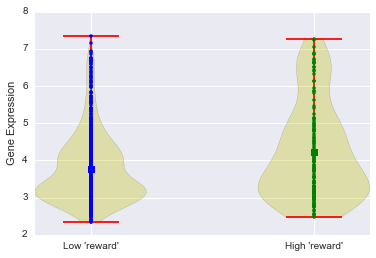

In [12]:
anal.term_ge_ttest(term, 1813, split_method='quant', graphops='violin')

In [13]:
ttest_metr = anal.term_ge_ttest_multi(term)

This may take a couple of minutes ...


In [ ]:
anal.fetch_gene_descriptions(ttest_metr, csv_path="../../", nih_fetch_num=40)

In [ ]:
anal.p_val_distr(ttest_metr)

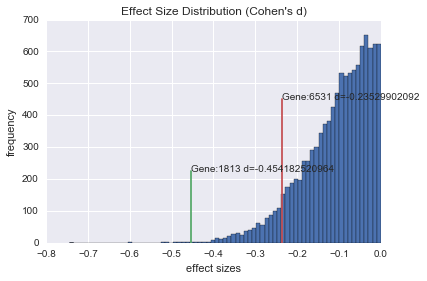

In [15]:
anal.cohen_d_distr(ttest_metr, genes_of_interest=[1813,6531])

In [ ]:
r_vals = anal.term_ge_spearman_rho(term)

In [ ]:
anal.rho_distr(r_vals, genes_of_interest=[1813,6531])